<a href="https://colab.research.google.com/github/Bhavyamadhuri/Bhavya_INFO5731_Fall2024/blob/main/Bhavya_Devarakonda_Assingment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
import pandas as pd
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download necessary stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the dataset
data = pd.read_csv('/content/club_churn_train.csv')

# Preprocess the text
def preprocess_text(text):
    words = [word.lower() for word in text.split() if word.isalpha() and word.lower() not in stop_words]
    return " ".join(words)

# Assuming 'MEMBERSHIP_STATUS' as the column for text-based analysis
data['processed_text'] = data['MEMBERSHIP_STATUS'].apply(preprocess_text)

# Check if the column is suitable for topic modeling
if data['processed_text'].isnull().all():
    raise ValueError("Processed text column is empty. Check your data or preprocessing step.")

# Using BERTopic for topic modeling
topic_model = BERTopic(
    nr_topics="auto",  # Automatically determine the optimal number of topics
    language="english"
)

topics, probabilities = topic_model.fit_transform(data['processed_text'])

# Identify the top 10 topics by frequency
topic_counts = Counter(topics)
top_topics = topic_counts.most_common(10)

# Display the top 10 topics and their representative words
print("Top 10 Topics and Their Keywords:")
n_top_words = 10

for topic_num, count in top_topics:
    if topic_num == -1:  # Skip the 'outlier' topic
        continue
    topic_words = [word[0] for word in topic_model.get_topic(topic_num)[:n_top_words]]
    print(f"Topic #{topic_num + 1}: {', '.join(topic_words)} ({count} documents)")

# Optionally, visualize the topics
topic_model.visualize_barchart(top_n_topics=10).show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Top 10 Topics and Their Keywords:
Topic #1: inforce, , , , , , , , ,  (854 documents)
Topic #2: inforce, , , , , , , , ,  (793 documents)
Topic #3: inforce, , , , , , , , ,  (792 documents)
Topic #4: inforce, , , , , , , , ,  (765 documents)
Topic #5: cancelled, , , , , , , , ,  (546 documents)
Topic #6: cancelled, , , , , , , , ,  (408 documents)
Topic #7: inforce, , , , , , , , ,  (361 documents)
Topic #8: cancelled, , , , , , , , ,  (290 documents)
Topic #9: cancelled, , , , , , , , ,  (234 documents)


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Naive Bayes Cross-validation Mean Accuracy: 0.698
Logistic Regression Cross-validation Mean Accuracy: 0.698

Naive Bayes Performance Metrics:
Accuracy: 0.692
Precision: 0.479
Recall: 0.692
F1 Score: 0.566

Logistic Regression Performance Metrics:
Accuracy: 0.692
Precision: 0.479
Recall: 0.692
F1 Score: 0.566

Model Comparison:
Accuracy: Naive Bayes (0.692) vs Logistic Regression (0.692)
Precision: Naive Bayes (0.479) vs Logistic Regression (0.479)
Recall: Naive Bayes (0.692) vs Logistic Regression (0.692)
F1 Score: Naive Bayes (0.566) vs Logistic Regression (0.566)


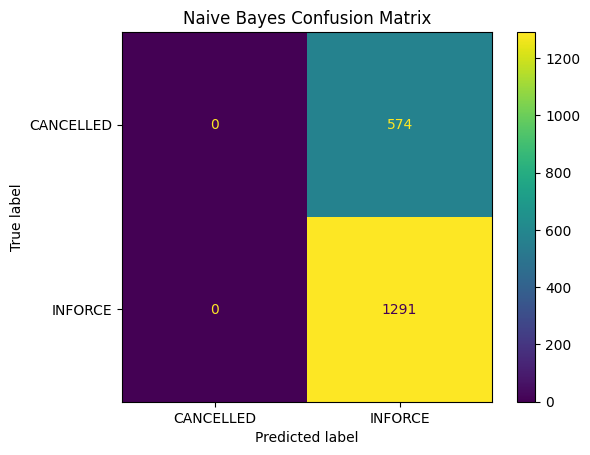

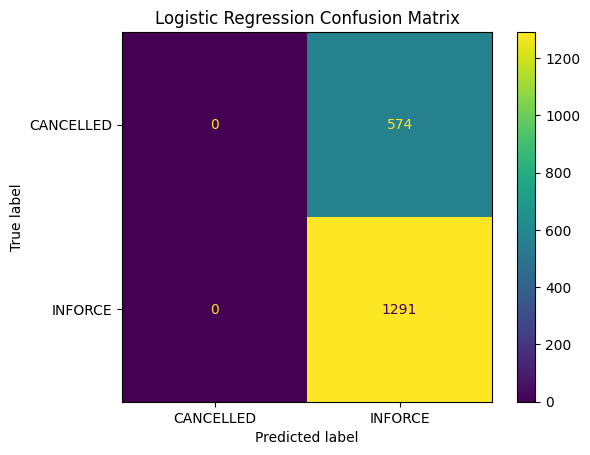

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Download the NLTK stopwords
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv('club_churn_train.csv')

# Drop unnecessary columns
data.drop(columns=['Unnamed: 0', 'MEMBERSHIP_NUMBER'], inplace=True)

# Handle missing values
data = data.dropna(subset=['MEMBERSHIP_STATUS', 'MEMBERSHIP_PACKAGE'])

# Clean text data (remove stopwords and lowercase text)
stop_words = set(stopwords.words('english'))

def clean_text(text):
    words = text.split()
    words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(words)

# Apply the text cleaning function to the `MEMBERSHIP_PACKAGE` column
data['processed_text'] = data['MEMBERSHIP_PACKAGE'].apply(clean_text)

# Encode the target variable (`MEMBERSHIP_STATUS`)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['MEMBERSHIP_STATUS'])

# Split the dataset into features (X) and target (y)
X = data['processed_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the models
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000)

# Perform cross-validation
nb_cv_scores = cross_val_score(nb_model, X_train_tfidf, y_train, cv=5)
lr_cv_scores = cross_val_score(lr_model, X_train_tfidf, y_train, cv=5)

print(f"Naive Bayes Cross-validation Mean Accuracy: {np.mean(nb_cv_scores):.3f}")
print(f"Logistic Regression Cross-validation Mean Accuracy: {np.mean(lr_cv_scores):.3f}")

# Train the models on the training set
nb_model.fit(X_train_tfidf, y_train)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
nb_predictions = nb_model.predict(X_test_tfidf)
lr_predictions = lr_model.predict(X_test_tfidf)

# Define the function to evaluate models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate the Naive Bayes model
nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_model(y_test, nb_predictions)
print("\nNaive Bayes Performance Metrics:")
print(f"Accuracy: {nb_accuracy:.3f}")
print(f"Precision: {nb_precision:.3f}")
print(f"Recall: {nb_recall:.3f}")
print(f"F1 Score: {nb_f1:.3f}")

# Evaluate the Logistic Regression model
lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(y_test, lr_predictions)
print("\nLogistic Regression Performance Metrics:")
print(f"Accuracy: {lr_accuracy:.3f}")
print(f"Precision: {lr_precision:.3f}")
print(f"Recall: {lr_recall:.3f}")
print(f"F1 Score: {lr_f1:.3f}")

# Compare the models
print("\nModel Comparison:")
print(f"Accuracy: Naive Bayes ({nb_accuracy:.3f}) vs Logistic Regression ({lr_accuracy:.3f})")
print(f"Precision: Naive Bayes ({nb_precision:.3f}) vs Logistic Regression ({lr_precision:.3f})")
print(f"Recall: Naive Bayes ({nb_recall:.3f}) vs Logistic Regression ({lr_recall:.3f})")
print(f"F1 Score: Naive Bayes ({nb_f1:.3f}) vs Logistic Regression ({lr_f1:.3f})")

# Confusion Matrix Visualization for Naive Bayes
ConfusionMatrixDisplay.from_predictions(y_test, nb_predictions, display_labels=label_encoder.classes_)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# Confusion Matrix Visualization for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, lr_predictions, display_labels=label_encoder.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9325 entries, 0 to 9324
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9325 non-null   int64  
 1   MEMBERSHIP_NUMBER      9325 non-null   object 
 2   MEMBERSHIP_TERM_YEARS  9325 non-null   int64  
 3   ANNUAL_FEES            9325 non-null   float64
 4   MEMBER_MARITAL_STATUS  6942 non-null   object 
 5   MEMBER_GENDER          8763 non-null   object 
 6   MEMBER_ANNUAL_INCOME   7716 non-null   float64
 7   MEMBER_OCCUPATION_CD   9284 non-null   float64
 8   MEMBERSHIP_PACKAGE     9325 non-null   object 
 9   MEMBER_AGE_AT_ISSUE    9325 non-null   int64  
 10  ADDITIONAL_MEMBERS     9325 non-null   int64  
 11  PAYMENT_MODE           9325 non-null   object 
 12  AGENT_CODE             9325 non-null   object 
 13  START_DATE             9325 non-null   int64  
 14  END_DATE               2830 non-null   float64
 15  MEMB

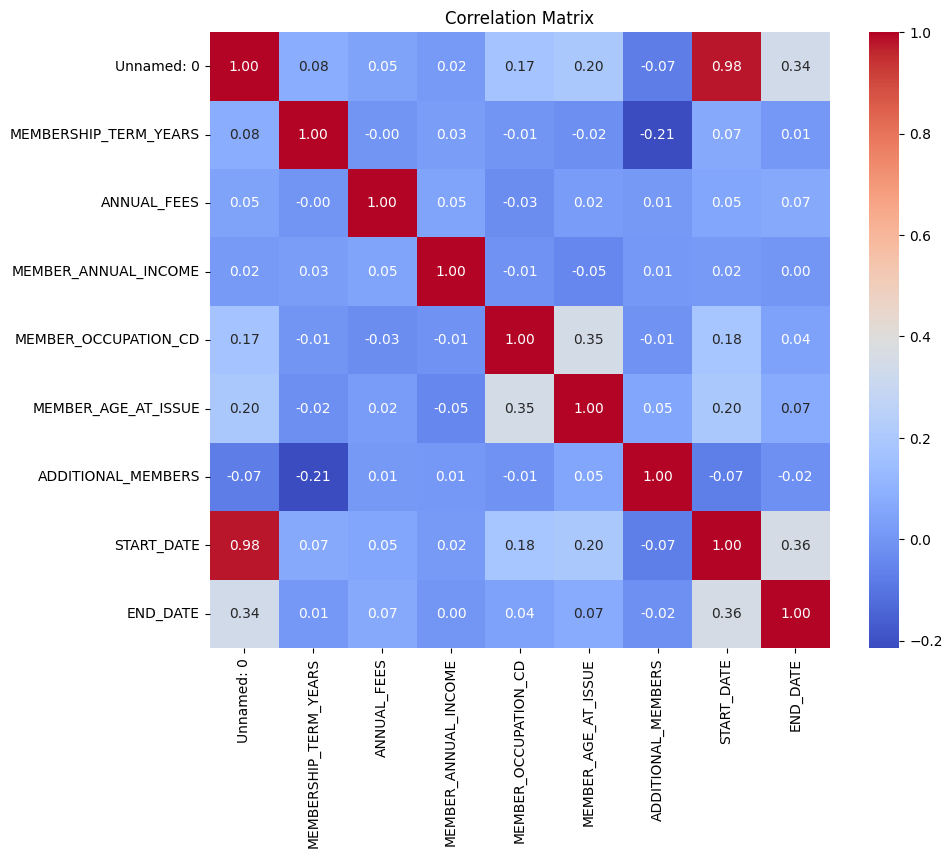

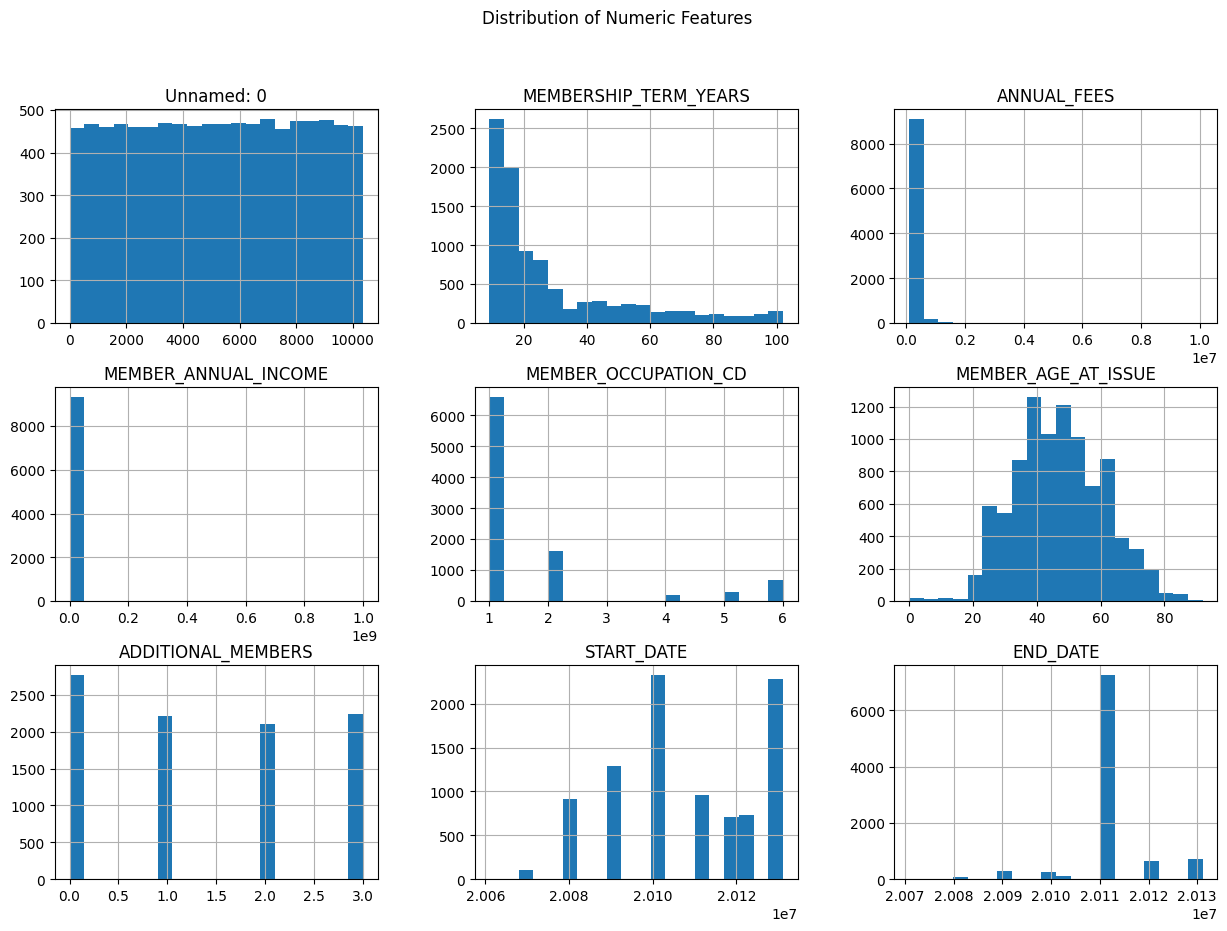

Mean Squared Error (MSE): 573177243186952.9
R-squared (R2): -0.0002210777853579593

Feature Importance (Coefficients):
                         Coefficient
MEMBERSHIP_TERM_YEARS  2.218063e+05
ANNUAL_FEES            1.080211e+06
MEMBER_AGE_AT_ISSUE   -7.315162e+05
ADDITIONAL_MEMBERS     4.034737e+05
START_DATE             4.012796e+05
END_DATE              -1.612882e+05


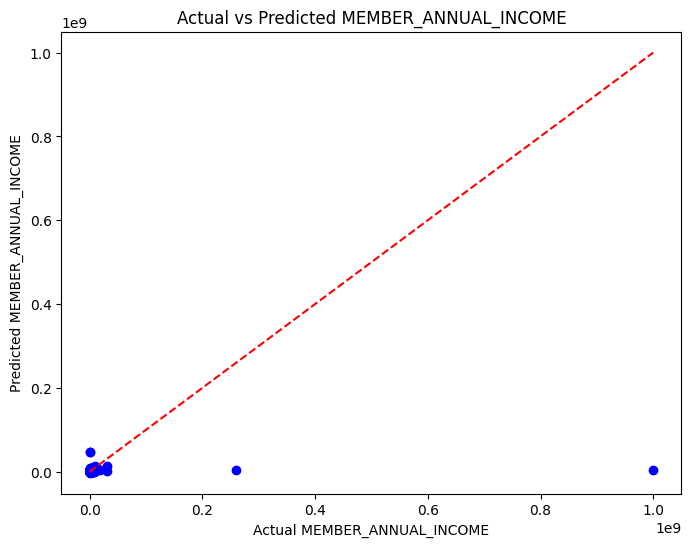

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
train_data = pd.read_csv("club_churn_train.csv")
test_data = pd.read_csv("club_churn_test.csv")

# Step 2: Exploratory Data Analysis (EDA)

# Overview of the dataset
print(train_data.info())
print(train_data.describe())

# Check for missing values
missing_train = train_data.isnull().sum().sort_values(ascending=False)
missing_test = test_data.isnull().sum().sort_values(ascending=False)

print("Missing values in train data:\n", missing_train[missing_train > 0])
print("Missing values in test data:\n", missing_test[missing_test > 0])

# Step 3: Handle missing values
# Fill missing numeric columns with the median and categorical with the mode
train_data['MEMBER_MARITAL_STATUS'].fillna(train_data['MEMBER_MARITAL_STATUS'].mode()[0], inplace=True)
train_data['MEMBER_GENDER'].fillna(train_data['MEMBER_GENDER'].mode()[0], inplace=True)
train_data['MEMBER_ANNUAL_INCOME'].fillna(train_data['MEMBER_ANNUAL_INCOME'].median(), inplace=True)
train_data['MEMBER_OCCUPATION_CD'].fillna(train_data['MEMBER_OCCUPATION_CD'].mode()[0], inplace=True)
train_data['END_DATE'].fillna(train_data['END_DATE'].median(), inplace=True)

test_data['MEMBER_MARITAL_STATUS'].fillna(test_data['MEMBER_MARITAL_STATUS'].mode()[0], inplace=True)
test_data['MEMBER_GENDER'].fillna(test_data['MEMBER_GENDER'].mode()[0], inplace=True)
test_data['MEMBER_ANNUAL_INCOME'].fillna(test_data['MEMBER_ANNUAL_INCOME'].median(), inplace=True)
test_data['MEMBER_OCCUPATION_CD'].fillna(test_data['MEMBER_OCCUPATION_CD'].mode()[0], inplace=True)
test_data['END_DATE'].fillna(test_data['END_DATE'].median(), inplace=True)

# Step 4: Calculate correlation (only numeric columns)
# Filter numeric columns for correlation
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
correlation = train_data[numeric_cols].corr()  # Only numeric columns
print("Correlation matrix:\n", correlation)

# Correlation with a specific target variable (e.g., MEMBER_ANNUAL_INCOME)
target = 'MEMBER_ANNUAL_INCOME'  # Example target variable
if target in numeric_cols:
    top_corr_features = correlation[target].sort_values(ascending=False).head(10)
    print(f"Top correlated features with {target}:\n", top_corr_features)
else:
    print(f"The target variable '{target}' is not numeric.")

# Step 5: Visualizations

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Histograms for numeric features
train_data[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features")
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 6: Additional analysis and model preparation

# Example: Prepare data for a predictive model (predicting MEMBER_ANNUAL_INCOME)
# Step 6.1: Select Features (independent variables) and Target (dependent variable)
# Exclude non-numeric columns that are not useful for predictive modeling
features = ['MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS', 'START_DATE', 'END_DATE']
target = 'MEMBER_ANNUAL_INCOME'

# Select feature columns and target column from training data
X_train = train_data[features]
y_train = train_data[target]

# Step 6.2: Train-Test Split
# Split the data into training and testing sets for model evaluation
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 6.3: Data Scaling
# Scale the data (important for many machine learning models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_test_scaled = scaler.transform(X_test_split)

# Step 6.4: Model Building
# Example: Linear Regression Model (for regression tasks like predicting MEMBER_ANNUAL_INCOME)
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train_split)

# Step 6.5: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test_split, y_pred)
r2 = r2_score(y_test_split, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Step 6.6: Feature Importance (if needed)
# For Linear Regression, feature coefficients can help identify important features
feature_importance = pd.DataFrame(model.coef_, index=features, columns=["Coefficient"])
print("\nFeature Importance (Coefficients):\n", feature_importance)

# Step 6.7: Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_split, y_pred, color='blue')
plt.plot([min(y_test_split), max(y_test_split)], [min(y_test_split), max(y_test_split)], color='red', linestyle='--')
plt.xlabel('Actual MEMBER_ANNUAL_INCOME')
plt.ylabel('Predicted MEMBER_ANNUAL_INCOME')
plt.title('Actual vs Predicted MEMBER_ANNUAL_INCOME')
plt.show()




# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
# Import necessary libraries to work with data and models
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the training and test datasets
train_data = pd.read_csv('club_churn_train.csv')
test_data = pd.read_csv('club_churn_test.csv')

# Check the columns in both train and test datasets to make sure we’re working with the right one
print("Train data columns:", train_data.columns)
print("Test data columns:", test_data.columns)

# Pick the text column for sentiment analysis
# If 'MEMBERSHIP_STATUS' is available, use it, otherwise fallback to 'MEMBER_MARITAL_STATUS'
train_text = train_data['MEMBERSHIP_STATUS'] if 'MEMBERSHIP_STATUS' in train_data.columns else train_data['MEMBER_MARITAL_STATUS']
test_text = test_data['MEMBERSHIP_STATUS'] if 'MEMBERSHIP_STATUS' in test_data.columns else test_data['MEMBER_MARITAL_STATUS']

# Initialize the zero-shot classification model (like BART here) for sentiment analysis
# Zero-shot classification lets us classify text even without training a model from scratch
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

# Define the possible sentiment labels we want to classify into
labels = ["positive", "negative", "neutral"]

# Run the model on all the text data in both train and test sets and get the predictions
train_predictions = [classifier(text, candidate_labels=labels) for text in train_text]
test_predictions = [classifier(text, candidate_labels=labels) for text in test_text]

# Extract the most likely sentiment label for each text from the predictions
train_pred_labels = [pred['labels'][pred['scores'].index(max(pred['scores']))] for pred in train_predictions]
test_pred_labels = [pred['labels'][pred['scores'].index(max(pred['scores']))] for pred in test_predictions]

# Now, we need to evaluate how well our model did
# For that, we need the true labels for both training and testing sets (ground truth)
# Ideally, these should be pre-labeled sentiments in the dataset, but since we don't have them,
# we’re using 'MEMBERSHIP_STATUS' as a placeholder for true labels (update it to the actual ground truth if available)
train_true_labels = train_data['MEMBERSHIP_STATUS']  # Replace with the actual true sentiment labels
test_true_labels = test_data['MEMBERSHIP_STATUS']    # Replace with the actual true sentiment labels

# Create a function to evaluate the model's performance (accuracy, precision, recall, F1 score)
def evaluate_model(true_labels, pred_labels):
    accuracy = accuracy_score(true_labels, pred_labels)  # How often we got it right
    precision = precision_score(true_labels, pred_labels, average='weighted')  # How many of the predicted positives were actually correct
    recall = recall_score(true_labels, pred_labels, average='weighted')  # How many of the actual positives we correctly identified
    f1 = f1_score(true_labels, pred_labels, average='weighted')  # Harmonic mean of precision and recall
    return accuracy, precision, recall, f1

# Now evaluate the model on both the train and test sets
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(train_true_labels, train_pred_labels)
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(test_true_labels, test_pred_labels)

# Print out the evaluation results (accuracy, precision, recall, F1 score)
print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Train Precision: {train_precision:.3f}")
print(f"Train Recall: {train_recall:.3f}")
print(f"Train F1 Score: {train_f1:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test Precision: {test_precision:.3f}")
print(f"Test Recall: {test_recall:.3f}")
print(f"Test F1 Score: {test_f1:.3f}")

# Optionally, save the predictions to CSV files for further review or analysis
# We can append the predicted sentiment labels to the data and save it
train_data['predicted_sentiment'] = train_pred_labels  # Add the sentiment predictions to the training data
test_data['predicted_sentiment'] = test_pred_labels    # Add the sentiment predictions to the test data
train_data.to_csv('train_predictions.csv', index=False)  # Save the predictions for the train data
test_data.to_csv('test_predictions.csv', index=False)  # Save the predictions for the test data


Train data columns: Index(['Unnamed: 0', 'MEMBERSHIP_NUMBER', 'MEMBERSHIP_TERM_YEARS',
       'ANNUAL_FEES', 'MEMBER_MARITAL_STATUS', 'MEMBER_GENDER',
       'MEMBER_ANNUAL_INCOME', 'MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE',
       'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS', 'PAYMENT_MODE',
       'AGENT_CODE', 'START_DATE', 'END_DATE', 'MEMBERSHIP_STATUS'],
      dtype='object')
Test data columns: Index(['Unnamed: 0', 'MEMBERSHIP_NUMBER', 'MEMBERSHIP_TERM_YEARS',
       'ANNUAL_FEES', 'MEMBER_MARITAL_STATUS', 'MEMBER_GENDER',
       'MEMBER_ANNUAL_INCOME', 'MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE',
       'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS', 'PAYMENT_MODE',
       'AGENT_CODE', 'START_DATE', 'END_DATE'],
      dtype='object')


KeyboardInterrupt: 